In [0]:
from google.colab import files
files.upload()


Saving train_2v.csv to train_2v.csv


{'train_2v.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\r\n30669,Male,3,0,0,No,children,Rural,95.12,18,,0\r\n30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0\r\n16523,Female,8,0,0,No,Private,Urban,110.89,17.6,,0\r\n56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0\r\n46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,,0\r\n32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,,0\r\n52800,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0\r\n41413,Female,75,0,1,Yes,Self-employed,Rural,243.53,27,never smoked,0\r\n15266,Female,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0\r\n28674,Female,74,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0\r\n10460,Female,79,0,0,Yes,Govt_job,Urban,77.08,35,,0\r\n64908,Male,79,0,1,Yes,Private,Urban,57.08,22,formerly smoked,0\r\n63884,Female,37,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0\r\n37893,Female,37,0,0,Yes,Private,Rural

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data=pd.read_csv('train_2v.csv')

In [0]:
df1=data.copy()

dropped id

In [0]:
df1.drop('id',axis=1,inplace=True)

label encoder categorical variables marriage status,worktype,resdtype,gender

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['ever_married']=le.fit_transform(df1['ever_married'])

In [0]:
df1['work_type']=le.fit_transform(df1['work_type'])
df1['Residence_type']=le.fit_transform(df1['Residence_type'])
df1['gender']=le.fit_transform(df1['gender'])


filled missing values in bmi with mean 

In [0]:
mean_value=df1['bmi'].mean()
df1['bmi']=df1['bmi'].fillna(mean_value)

In [0]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [0]:
df1.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

filled null values in smoking status with mode data


In [0]:
df1['smoking_status'].fillna(df1['smoking_status'].mode()[0], inplace=True)



encoded smoking data by label encoder

In [0]:
df1['smoking_status']=le.fit_transform(df1['smoking_status'])

In [0]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

imported smote because of imbalance data

In [0]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
ros=RandomOverSampler(random_state=0)
smote=SMOTE()

assigned datat to variables havin smoking status

In [0]:
x_resampled,y_resampled =smote.fit_resample(df1.loc[:,df1.columns!='stroke'],df1['stroke'])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier()

In [0]:
rclf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,classification_report,precision_score
y_predict=rclf.predict(x_test)

In [0]:
print(len(x_test))
print(precision_score(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(f1_score(y_predict,y_test))


25571
0.9979314185694964
0.9892065230143522
0.9804580630032049
[[12752    26]
 [  250 12543]]
0.989117577478117


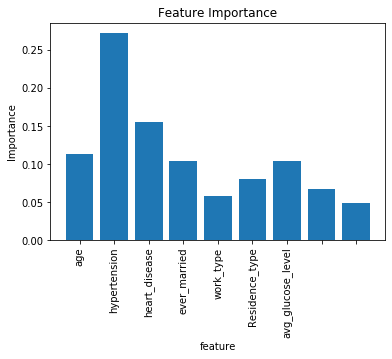

['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level']
[0.1124535  0.27214935 0.15482573 0.10362679 0.05726774 0.08068282
 0.10443953 0.06644603 0.04810851]


In [0]:
plt.bar(range(len(rclf.feature_importances_)), rclf.feature_importances_)
plt.xlabel("feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(dtc.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)
print(rclf.feature_importances_)

removed smoking status and assigned to df2

In [0]:

df2=df1.drop('smoking_status',axis=1)


In [0]:
feature=x1=df2.iloc[:,df2.columns !='stroke']
y1=df2.iloc[:,df2.columns=='stroke']

## without smoke__random forest

stored without smoking status to x_resampled1

In [0]:
x_resampled1,y_resampled1 =smote.fit_resample(df2.loc[:,df2.columns!='stroke'],df2['stroke'])#without smoke

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled1,y_resampled1,random_state=42,test_size=0.3)

In [0]:
rclf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,classification_report
y_predict=rclf.predict(x_test)

In [0]:
print(accuracy_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(f1_score(y_predict,y_test))
print(precision_score(y_test,y_predict))

0.9883852802002269
0.979598217775346
[[12742    36]
 [  261 12532]]
0.9882891053191909
0.9971355824315723


decision tree

In [0]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc=DecisionTreeClassifier()

decision tree wit smoking status

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

In [0]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict=dtc.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,classification_report

In [0]:
print('accuracy score is',accuracy_score(y_test,y_predict))
print('recall score is ',recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('f1 score is',f1_score(y_predict,y_test))
print(precision_score(y_test,y_predict))

accuracy score is 0.9789605412381213
recall score is  0.9806143984991792
[[12488   290]
 [  248 12545]]
f1 score is 0.9790073357265491
0.9774055317491235


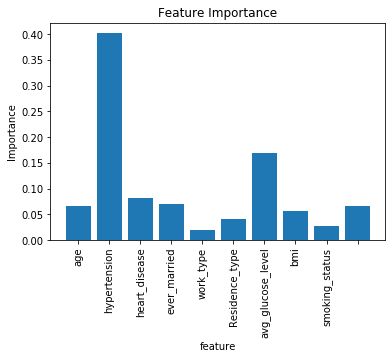

['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
[0.06670191 0.40234446 0.08086806 0.06937282 0.01948381 0.04048091
 0.16993831 0.05583195 0.02787149 0.06710628]


In [0]:
plt.bar(range(len(dtc.feature_importances_)), dtc.feature_importances_)
plt.xlabel("feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(dtc.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)
print(dtc.feature_importances_)

In [0]:
#decision tree without smoke
x_train,x_test,y_train,y_test=train_test_split(x_resampled1,y_resampled1,random_state=42,test_size=0.3)

In [0]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict=dtc.predict(x_test)

In [0]:
print('accuracy score is',accuracy_score(y_test,y_predict))
print('recall score is ',recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('f1 score is',f1_score(y_predict,y_test))
print(precision_score(y_test,y_predict))

accuracy score is 0.97716162840718
recall score is  0.9797545532713202
[[12453   325]
 [  259 12534]]
f1 score is 0.9772337439575861
0.9747258729294658


In [0]:
features = list(x.columns[1:11])

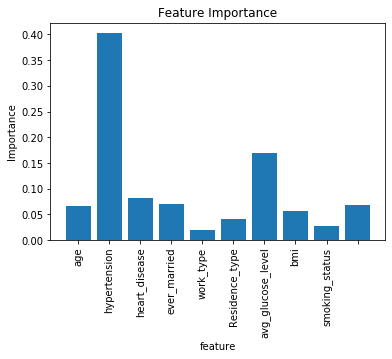

['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
[0.06632121 0.40283897 0.0808448  0.06937282 0.0196953  0.04025501
 0.17007531 0.05565565 0.02763857 0.06730238]


In [0]:
plt.bar(range(len(dtc.feature_importances_)), dtc.feature_importances_)
plt.xlabel("feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(dtc.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)
print(dtc.feature_importances_)

kNN WITH SMOKING DATA


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)#knn with smoke

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [0]:
print('accuracy score is',accuracy_score(y_test,y_pred))
print('recall score is ',recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('f1 score is',f1_score(y_pred,y_test))
print(precision_score(y_test,y_pred))

accuracy score is 0.914903601736342
recall score is  0.9924958961932306
[[10698  2080]
 [   96 12697]]
f1 score is 0.9210736307580704
0.8592407119171686


KNN WITHOUT SMOKING


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled1,y_resampled1,random_state=42,test_size=0.3)#without smoke

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [0]:
print('accuracy score is',accuracy_score(y_test,y_pred))
print('recall score is ',recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('f1 score is',f1_score(y_pred,y_test))
print("Classification report: ")
print(classification_report(y_pred,y_test))
print(precision_score(y_test,y_pred))

accuracy score is 0.9158421649524853
recall score is  0.9899945282576409
[[10754  2024]
 [  128 12665]]
f1 score is 0.9216941998398951
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     10882
           1       0.99      0.86      0.92     14689

    accuracy                           0.92     25571
   macro avg       0.92      0.93      0.92     25571
weighted avg       0.93      0.92      0.92     25571

0.8622098168697665


SVM WITH SMOKE


In [0]:

x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

In [0]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print('accuracy score is',accuracy_score(y_test,y_predict))
print('recall score is ',recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('f1 score is',f1_score(y_predict,y_test))
print("Classification report: ")
print(classification_report(y_predict,y_test))
print(precision_score(y_test,y_predict))

accuracy score is 0.9628094325603223
recall score is  0.9903071992495897
[[11951   827]
 [  124 12669]]
f1 score is 0.9638251740271597
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12075
           1       0.99      0.94      0.96     13496

    accuracy                           0.96     25571
   macro avg       0.96      0.96      0.96     25571
weighted avg       0.96      0.96      0.96     25571

0.9387225844694724


svm without smoke

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled1,y_resampled1,random_state=42,test_size=0.3)

In [0]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print('accuracy score is',accuracy_score(y_test,y_predict))
print('recall score is ',recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('f1 score is',f1_score(y_predict,y_test))
print("Classification report: ")
print(classification_report(y_predict,y_test))
print(precision_score(y_test,y_predict))

accuracy score is 0.9567869852567361
recall score is  0.9854607988743844
[[11859   919]
 [  186 12607]]
f1 score is 0.9580151221550971
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12045
           1       0.99      0.93      0.96     13526

    accuracy                           0.96     25571
   macro avg       0.96      0.96      0.96     25571
weighted avg       0.96      0.96      0.96     25571

0.932056779535709


logistic regression before smotting with smoke status

In [0]:
x=df1.iloc[:,df1.columns !='stroke']
y=df1.iloc[:,df1.columns=='stroke']

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [0]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict=classifier.predict(x_test)

In [0]:
print("Classification report: ")
print(classification_report(y_predict,y_test))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10850
           1       0.00      0.00      0.00         0

    accuracy                           0.98     10850
   macro avg       0.50      0.49      0.50     10850
weighted avg       1.00      0.98      0.99     10850



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


logistic regression of smotted data with smoke

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

In [0]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict=classifier.predict(x_test)

In [0]:
print('accuracy score is',accuracy_score(y_test,y_predict))
print('recall score is ',recall_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('f1 score is',f1_score(y_predict,y_test))
print("Classification report: ")
print(classification_report(y_predict,y_test))
print(precision_score(y_test,y_predict))

accuracy score is 0.7783817605881663
recall score is  0.812475572578754
[[ 9510  3268]
 [ 2399 10394]]
f1 score is 0.7857871857871858
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     11909
           1       0.81      0.76      0.79     13662

    accuracy                           0.78     25571
   macro avg       0.78      0.78      0.78     25571
weighted avg       0.78      0.78      0.78     25571

0.7607963694920217


logistic regression without smoke status

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled1,y_resampled1,random_state=42,test_size=0.3)

In [0]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
print('accuracy score is',accuracy_score(y_test,y_pred))
print('recall score is ',recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('f1 score is',f1_score(y_pred,y_test))
print("Classification report: ")
print(classification_report(y_pred,y_test))
print(precision_score(y_test,y_pred))

accuracy score is 0.7781471197841304
recall score is  0.8116938950988822
[[ 9514  3264]
 [ 2409 10384]]
f1 score is 0.7854468439166445
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     11923
           1       0.81      0.76      0.79     13648

    accuracy                           0.78     25571
   macro avg       0.78      0.78      0.78     25571
weighted avg       0.78      0.78      0.78     25571

0.7608440797186401
